In [1]:
import pandas as pd
matches = pd.read_csv('/content/match_df')

# dropping unneccessary columns
matches.drop(columns=['Unnamed: 0', 'time', 'comp', 'day', 'attendance', 'captain', 'formation', 'referee', 'match report', 'notes'], inplace=True)

In [2]:
matches.columns

Index(['date', 'round', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga',
       'poss', 'sh', 'sot', 'sot%', 'g/sh', 'dist', 'fk', 'pk', 'pkatt',
       'def 3rd', 'mid 3rd', 'att 3rd', 'tkl%', 'lost', 'int', 'season',
       'team'],
      dtype='object')

In [ ]:
#!pip install sweetviz
import sweetviz

analyze_df = sweetviz.analyze([matches, "match_data"])

analyze_df.show_html('analyze.html')

In [3]:
# Group data by team & season
season_grouped_matches = matches.groupby(['team', 'season'])

season_team_stats = season_grouped_matches.agg({
    'gf': 'mean',
    'ga': 'mean'
    })
season_team_stats.head()

gf        ga
team          season                    
Alaves        2021    0.947368  1.500000
              2022    0.815789  1.710526
Almeria       2023    1.289474  1.710526
Athletic Club 2021    1.210526  1.105263
              2022    1.131579  0.947368

In [ ]:
import matplotlib.pyplot as plt

# Unstack the multi-index to make it easier to plot
season_team_stats_unstacked = season_team_stats.unstack()


In [23]:
season_team_stats_unstacked.head()

gf                            ga                    
season               2021      2022      2023      2021      2022      2023
team                                                                       
Alaves           0.947368  0.815789       NaN  1.500000  1.710526       NaN
Almeria               NaN       NaN  1.289474       NaN       NaN  1.710526
Athletic Club    1.210526  1.131579  1.236842  1.105263  0.947368  1.131579
Atletico Madrid  1.763158  1.710526  1.842105  0.657895  1.131579  0.868421
Barcelona        2.236842  1.789474  1.842105  1.000000  1.000000  0.526316

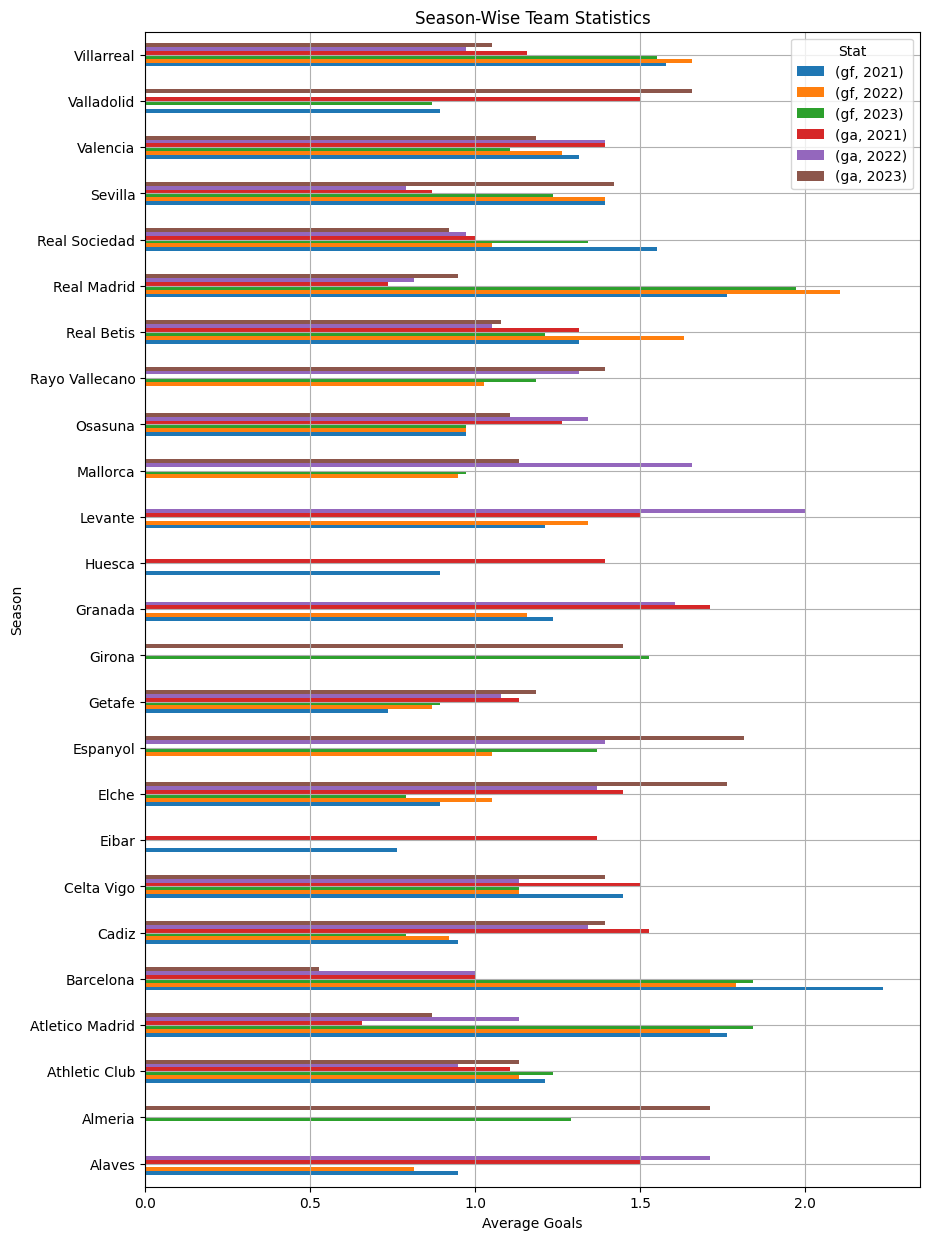

In [24]:
# Create a bar plot
ax = season_team_stats_unstacked.plot(kind='barh', figsize=(10, 15))
plt.title("Season-Wise Team Statistics")
plt.xlabel("Average Goals")
plt.ylabel("Season")
plt.legend(title="Stat", loc="best")
plt.grid(True)
plt.show()


In [25]:
# Group data by team & venue

venue_grouped_matches = matches.groupby(['team', 'venue'])
venue_team_stats = venue_grouped_matches.agg({
    'gf': 'mean',
    'ga': 'mean'
    })
venue_team_stats.head()

gf        ga
team          venue                    
Alaves        Away   0.763158  2.000000
              Home   1.000000  1.210526
Almeria       Away   1.052632  2.263158
              Home   1.526316  1.157895
Athletic Club Away   0.982456  1.210526

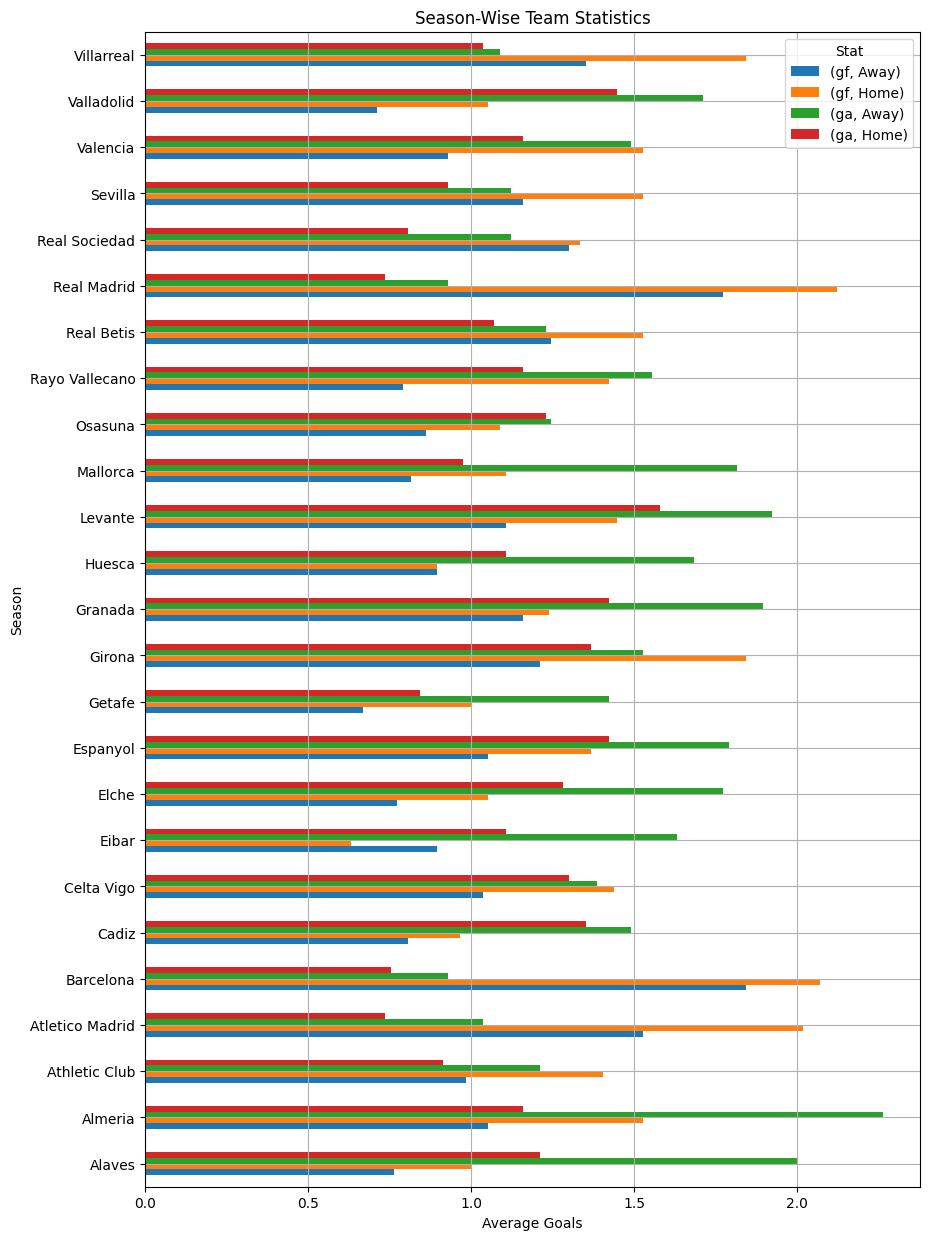

In [26]:
venue_team_stats_unstacked = venue_team_stats.unstack()

ax = venue_team_stats_unstacked.plot(kind='barh', figsize=(10, 15))
plt.title("Season-Wise Team Statistics")
plt.xlabel("Average Goals")
plt.ylabel("Season")
plt.legend(title="Stat", loc="best")
plt.grid(True)
plt.show()

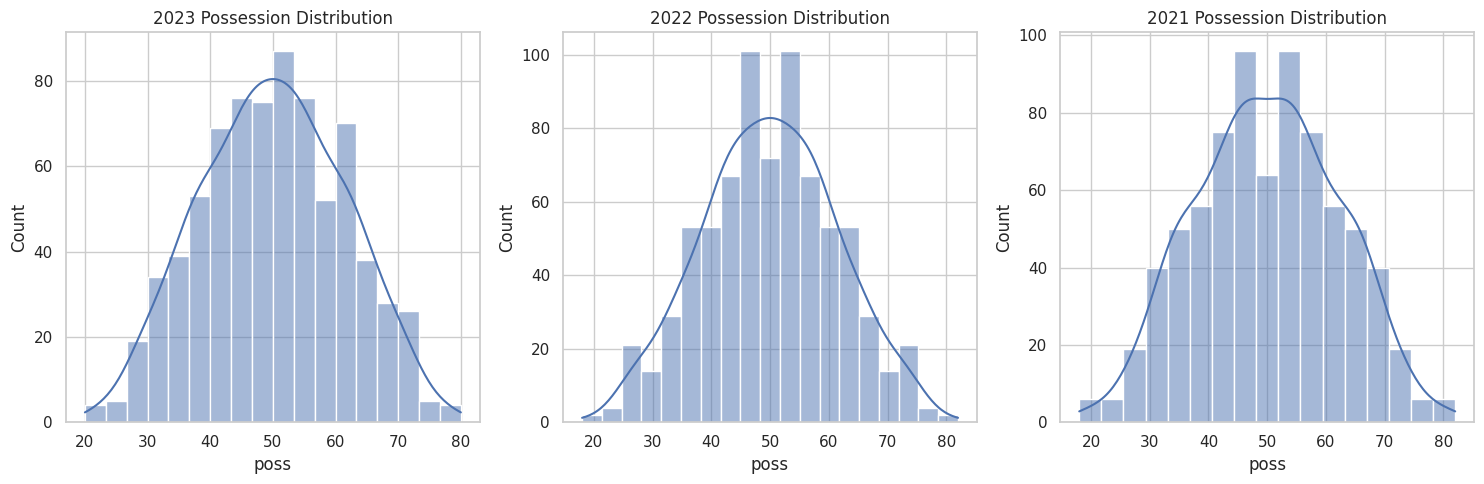

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

season_matches = matches.groupby('season')

# Possession distribution
sns.histplot(season_matches.get_group(2023)["poss"], kde=True, ax=axes[0])
axes[0].set_title("2023 Possession Distribution")

sns.histplot(season_matches.get_group(2022)["poss"], kde=True, ax=axes[1])
axes[1].set_title("2022 Possession Distribution")

sns.histplot(season_matches.get_group(2021)["poss"], kde=True, ax=axes[2])
axes[2].set_title("2021 Possession Distribution")

plt.tight_layout()
plt.show()


In [ ]:
# Create a pair plot to visualize correlations
sns.pairplot(matches[["poss", 'gf', 'ga', 'sot']])
plt.show()

# Create a heatmap to visualize the correlation matrix
correlation_matrix = matches[["poss", 'gf', 'ga', 'sot']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
